# Multilayer Perceptron from MNIST raw data using Keras

This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

If Keras is not installed: `pip install keras` in your terminal.

## Loading the packages

In [4]:
import numpy as np
from matplotlib import pyplot as pl

# ... import here the different keras libraries you need
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.layers import Dropout,Conv2D,Activation,MaxPooling2D,Flatten

from sklearn import metrics as me


%matplotlib inline

## Loading the raw data
Keras provides easy access to different datasets including MNIST. First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train =  X_train.astype('float32')                       #change the type towards float32
X_test =   X_test.astype('float32')                        #idem
X_train /= 255.0                                           #normalize the range to be between 0.0 and 1.0
X_test /=  255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [6]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)   #modify targets to 1-hot using np_utils.to_categorical()
Y_test = np_utils.to_categorical(y_test,n_classes)                   #idem 
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Define the network
The neural network will be a Multi-Layer Perceptron in our case. We will train it using H neurons, through E epochs, using batches of size B. We can try with 300 neuros, 10 epochs and batches of 128 images. We will also need to tell Keras what is the size of our inputs, in our case a linearized vector of size D=784.

In [31]:
H = 400               # number of neurons
E = 20                # number of epochs
B = 128               # batch size
D = X_train.shape[1]  # dimension of input sample - 784 for MNIST
dim = X_train.shape[3]

# paramters: nr. weights: 784*300, nr. b: 300

model = Sequential()                                    # define the model as a Sequential type
model.add(Conv2D(D,(dim,dim),strides=1, padding='same'))  # add the hidden layer of type Dense with relu activation
model.add(Activation('relu'))

model.add(Dropout(0.3))
 
model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
 
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.3))
 
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [32]:
# compile the model with a crossentropy loss, rmsprop optimizer 
# and defining metrics to be stored as history of the training
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) 


# call the training with the fit() function giving the tensors as 
# inputs, defining batch size, number of epochs and validation data
log = model.fit(X_train, Y_train, batch_size=B, epochs=E, verbose=1, validation_data=(X_test,Y_test))

model.summary()# print model infomration with summary() method

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 441s 9ms/step - loss: 1.8525 - acc: 0.3268 - val_loss: 1.6277 - val_acc: 0.4329
Epoch 2/20
50000/50000 [==============================] - 409s 8ms/step - loss: 1.3656 - acc: 0.5136 - val_loss: 1.1965 - val_acc: 0.5759
Epoch 3/20
50000/50000 [==============================] - 482s 10ms/step - loss: 1.1379 - acc: 0.5982 - val_loss: 1.0298 - val_acc: 0.6406
Epoch 4/20
50000/50000 [==============================] - 485s 10ms/step - loss: 0.9959 - acc: 0.6475 - val_loss: 0.9546 - val_acc: 0.6717
Epoch 5/20
50000/50000 [==============================] - 444s 9ms/step - loss: 0.8940 - acc: 0.6865 - val_loss: 0.9153 - val_acc: 0.6813
Epoch 6/20
50000/50000 [==============================] - 438s 9ms/step - loss: 0.8149 - acc: 0.7144 - val_loss: 0.8316 - val_acc: 0.7161
Epoch 7/20
50000/50000 [==============================] - 374s 7ms/step - loss: 0.7532 - acc: 0.7370 - val_loss: 0.8592 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

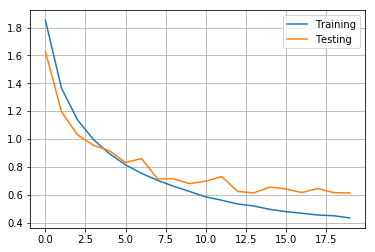

In [33]:
pl.plot(log.history['loss'], label='Training')
pl.plot(log.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [34]:
loss_test, metric_test = model.evaluate(X_test, Y_test,verbose=1) # evaluate model performance on test set
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

10000/10000 [==============================] - 25s 3ms/step
Test loss: 0.6119440766334534
Test accuracy: 0.7915


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [35]:
pred = model.predict_classes(X_test, verbose=1)
me.confusion_matrix(y_test, pred)

10000/10000 [==============================] - 23s 2ms/step


array([[815,   9,  38,   9,  12,   1,   0,   7,  85,  24],
       [  5, 906,   5,   2,   4,   1,   4,   1,  26,  46],
       [ 64,   1, 763,  29,  67,  23,  14,  25,  11,   3],
       [ 23,   7,  71, 665,  52,  92,  27,  36,  20,   7],
       [ 17,   3,  61,  50, 790,  12,  13,  44,   8,   2],
       [ 13,   2,  84, 163,  42, 619,  10,  56,   6,   5],
       [  9,   6,  86,  78,  43,  21, 731,  12,  11,   3],
       [ 14,   0,  31,  40,  43,  17,   1, 840,   6,   8],
       [ 32,  13,  10,   3,   1,   0,   1,   3, 929,   8],
       [ 27,  61,   7,  13,   5,   3,   1,   8,  18, 857]])